<a href="https://colab.research.google.com/github/saptaksubhra/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>






# What is AirBNB ?

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales and hospitality service for people to lease or rent short-term lodging including holiday cottages, apartments, homestays, hostel beds, or hotel rooms. Basically they provide the platform that is shared by hosts and visitors worldwide. Lets look at the dataset once.

# Initial Setup :

# 1.Importing Ncecessary Libraries 

# 2.Loading AirBNB Dataset

# 3.Data Cleaning:

* Dropping duplicates

* Cleaning individual columns

* Remove the Null values from the dataset

* Required Transformations for Analysis

#4. Data Visualization


Questions to be answered :

* Find out Total Count of Each Room Type as per Listing

* What is the average preferred price by customers according to the location?


In [1]:
# Importing required libraries first

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Mount google drive to have access the dataset of Airbnb

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
# Loading data from AirBNB csv file

df_airbnb = pd.read_csv('/content/drive/MyDrive/Air BNB EDA Project/Airbnb NYC 2019.csv')

In [4]:
df_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
# Getting into data
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df_airbnb.shape

(48895, 16)

In [8]:
# Gaining important information of the data

df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
# Making a copy of the orginal dataset for EDA purpose

df_airbnb_copy = df_airbnb.copy()
df_airbnb_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Observations
# Cleaning the data

**So, it is evident from the dataset that we have 48895 number of rows and 16 columns.  Some columns have null values and missing data. We need to clean those.**

In [10]:
# checking null values

df_airbnb_copy.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# Removing duplicates if any in the dataset

df_airbnb_copy.duplicated().sum()
df_airbnb_copy.drop_duplicates(inplace = True)
df_airbnb_copy.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
# Dropping null values

df_airbnb_copy_non_null = df_airbnb_copy.dropna()

In [13]:
df_airbnb_copy_non_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

# Observations of Columns :

Let's try to make out those columns in detail.

id : unique id to identify Airbnb listing                     
name : Represent the accommodation                            
host_id :a unique id identifying an airbnb host                           
host_name : name under whom host is registered                     
neighbourhood_group : a group of area               
neighbourhood : area which falls under neighbourhood_group                       
latitude : co-ordinate of listing                             
longitude : co-ordinate of listing                          
room_type : type to categorise listing rooms                           
price : price of listing                              
minimum_nights : The minimum number of nights requierd to stay in a single visit                    
number_of_reviews : Total number of reviews given by visitors                   
last_review : date of last review given                    
reviews_per_month : rate of reviews given on monthly basis                
calculated_host_listings_count : Total number of listings registered under the name of the host

availability_365 : the number of days for which a host is available in a year


latitude and longitude have epresentation in terms of the co-ordinate system, neighbourhood_group, neighbourhood and room_type are categorical type columns. last_review is a column of date type, we will convert it as per requirement. 


# # 1.Find out Total Count of Each Room Type as per Listing

In [14]:
# Finding unique values of column room_type

df_airbnb_copy_room_type = df_airbnb_copy.room_type.unique()

In [15]:
df_airbnb_copy_room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
# Finding out the most listed room type

df_airbnb_copy_most_listed = dict(df_airbnb_copy.room_type.value_counts())

In [17]:
df_airbnb_copy_most_listed

{'Entire home/apt': 25409, 'Private room': 22326, 'Shared room': 1160}

In [18]:
# Creating dataset for total count of each room type

dataset = list(df_airbnb_copy_most_listed.values())

In [19]:
dataset

[25409, 22326, 1160]

In [20]:
room_type = list(df_airbnb_copy_most_listed.keys())

In [21]:
room_type

['Entire home/apt', 'Private room', 'Shared room']

Text(0.5, 1.0, 'Count of Listed Rooms')

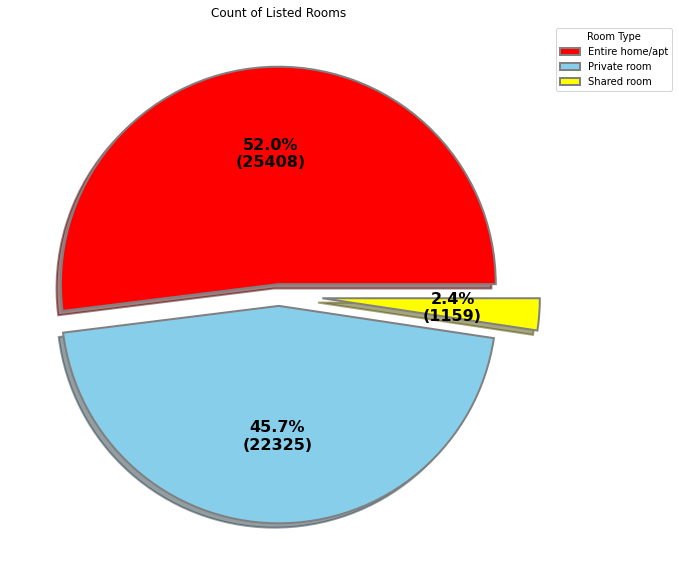

In [22]:
# Generating colour parameters

colors = ('red', 'skyblue', 'yellow')

# Creating explode data

explode = (0.05,0.05, 0.2)

# properities of wedge

wp = {'linewidth' : 2, 'edgecolor' : 'grey' }

# create autocpt arguments by creating a custom function

def fun(pct, allvalues):
  ''' This function creates autocpt arguments. '''
  abs = int(pct / 100. *np.sum(allvalues))
  return "{:.1f}%\n({:d})".format(pct, abs)

# Creating pie chart and plot

fig, airbnb_pie_chart = plt.subplots(figsize = (12, 10))
wedges, texts, autotexts = airbnb_pie_chart.pie(dataset, autopct = lambda pct: fun(pct, dataset), 
                                                  explode = explode, 
                                                  shadow = True, 
                                                  colors = colors, 
                                                  startangle = 0,
                                                  wedgeprops = wp, textprops = dict(color = 'black'))


# Adding legend
airbnb_pie_chart.legend(wedges, room_type,
                        title ="Room Type",
                        loc ="upper left",          
                        bbox_to_anchor=(1, 0., 0.,1))

plt.setp(autotexts, size = 16, weight = "bold")
airbnb_pie_chart.set_title("Count of Listed Rooms")


# Observations :



 **It is evident from the above pie chart analysis that Entire home/apt has the highest percentage as per listing of the total count of room type and Private room has 45.7% of listing and Shared room has the lowest percentage and that is 2.4%.**




# # 2. What is the average preferred price by the customers in accordance with locations ?

In [23]:
# Brief description regarding numerical columns in the dataset

df_airbnb_copy.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [24]:
df_airbnb_copy.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [25]:
# Average preferred price of property in accordance with locations

df_avg_preferred_price = df_airbnb_copy.groupby(['neighbourhood_group', 'room_type'], as_index = False)['price'].mean().rename(columns = {'neighbourhood_group' : 'Location', 'price' : 'Average Price'})

In [26]:
df_avg_preferred_price

,Location,room_type,Average Price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [27]:
# Unstack the groupby information to plot the graph

df_avg_preferred_price_unstack = df_airbnb_copy.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()

In [28]:
df_avg_preferred_price_unstack

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


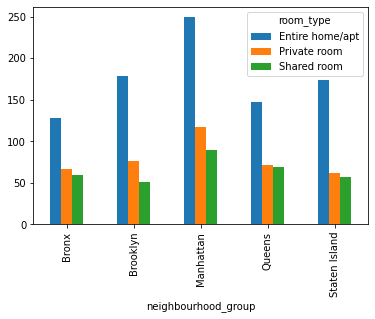

In [29]:
# Detect graph of average price of property in terms of locations

df_avg_preferred_price_unstack.plot.bar()

# Observation
 **From the above analysis in the bar graph, we can say that Manhattan has the highest price in terms of Entire home/apt whereas average price of Shared room is the lowest in case of Brooklyn. On the other hand, Bronx, Queens and Staten Island have the alomst the same price for both Private room and Shared room. And the price is alomst $50.**

# 3. Where the customers pay the maximum and minimum rent ( in terms of loactions ) ?

In [36]:
# Find out maximum rent with respect to locations by creating a new dataframe

df_max_price = df_airbnb_copy.groupby('neighbourhood_group', as_index = False)['price'].max().sort_values(['price'], ascending = False).rename(columns = {'price': "Maximum Price", 'neighbourhood_group': 'Location'})

df_max_price

,Location,Maximum Price
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000
0,Bronx,2500


In [37]:
# Find out minimum rent with respect to loactions by creating a new dataframe

df_min_price = df_airbnb_copy.groupby('neighbourhood_group', as_index = False)['price'].min().sort_values(['price'], ascending = True).rename(columns= {'price' : 'Minimum Price', 'neighbourhood_group': 'Location'})

df_min_price

,Location,Minimum Price
0,Bronx,0
1,Brooklyn,0
2,Manhattan,0
3,Queens,10
4,Staten Island,13


In [39]:
# Brief description regarding numerical columns in the dataset

df_airbnb_copy.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Observations :

From the above dataframe, we can say that there are some values as $0 in case of mimnimum price. But, on the other hand, AirBNB does not provide free accommodation to its customers in any hotel. To fix this problem, we need to create a user-defined function in which the minimum price is based on the minimum night spent.

There are also some other entries in the dataset in which minimum night is 1 and the respective price is $0.

This is not feasible in this scenario. So, we need to replace those price values which are less than $100 with mean value.